## **Installing packages**

Installing scikit learn for calculating ROC_AUC **score**

In [55]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Importing packages**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk
import io

## **Upload the data**

Initial data analysis suggests that there are some duplicate rows. 
We remove that here

In [57]:
data = pd.read_csv('data_banknote_authentication.csv')

In [58]:
data[data.duplicated()]

,variance,skewness,curtosis,entropy,class
47,-0.7869,9.5663,-3.7867,-7.5034,0
139,-0.2062,9.2207,-3.7044,-6.8103,0
190,0.9297,-3.7971,4.6429,-0.2957,0
195,-1.8584,7.8860,-1.6643,-1.8384,0
226,0.5706,-0.0248,1.2421,-0.5621,0
268,0.9297,-3.7971,4.6429,-0.2957,0
284,-1.3000,10.2678,-2.9530,-5.8638,0
300,0.3292,-4.4552,4.5718,-0.9888,0
315,0.3292,-4.4552,4.5718,-0.9888,0
320,0.5195,-3.2633,3.0895,-0.9849,0


In [59]:
data.drop_duplicates()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


## **Preprocessing the data**


**Normalise data and more preprocessing**

In [60]:
df_min_max_scaled = data.copy()
  
col = ["curtosis", "variance", "skewness", "entropy"]
# col = ["targeted_productivity", "smv", "over_time","incentive", "idle_time", "idle_men", "no_of_style_change", "no_of_workers"]
# apply normalization techniques
for column in col :
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
data = df_min_max_scaled

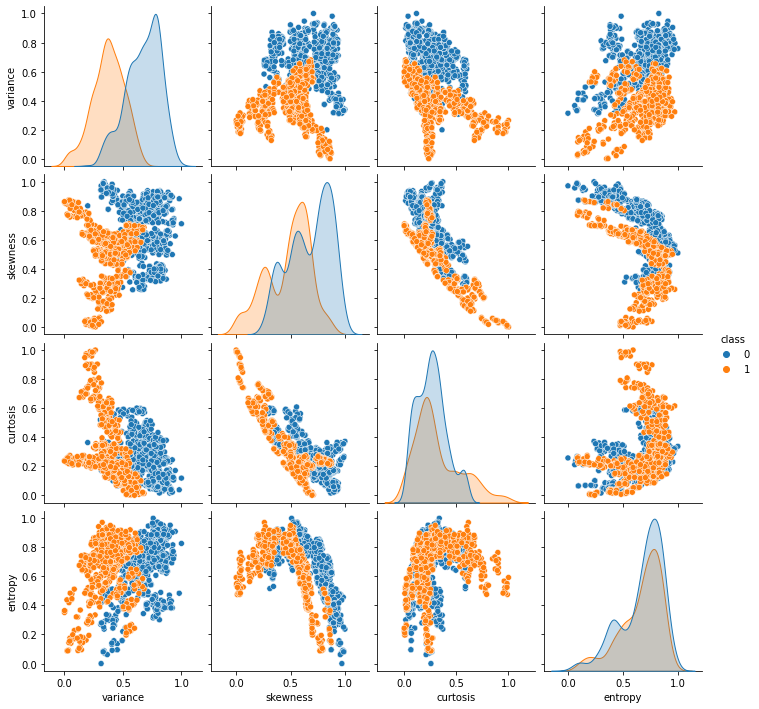

In [61]:
sns.pairplot(data, hue = "class")

In [62]:
# data.drop(axis = "columns", labels={"curtosis", "entropy"}, inplace = True)
data

,variance,skewness,curtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,0
1,0.835659,0.820982,0.121804,0.644326,0
2,0.786629,0.416648,0.310608,0.786951,0
3,0.757105,0.871699,0.054921,0.450440,0
4,0.531578,0.348662,0.424662,0.687362,0
...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1
1368,0.407690,0.332868,0.506753,0.808350,1
1369,0.237385,0.011768,0.985603,0.524755,1
1370,0.250842,0.201701,0.761587,0.660675,1


**Split the 2 classes. Then split them into input and output.**

In [63]:
label0 = data[data['class'] == 0]
label1 = data[data['class'] == 1]
print(label0, label1)

     variance  skewness  curtosis   entropy  class
0    0.769004  0.839643  0.106783  0.736628      0
1    0.835659  0.820982  0.121804  0.644326      0
2    0.786629  0.416648  0.310608  0.786951      0
3    0.757105  0.871699  0.054921  0.450440      0
4    0.531578  0.348662  0.424662  0.687362      0
..        ...       ...       ...       ...    ...
757  0.699702  0.633915  0.312232  0.794241      0
758  0.791316  0.584747  0.226708  0.889240      0
759  0.509081  0.840649  0.287979  0.416578      0
760  0.741586  0.530700  0.288091  0.885949      0
761  0.670121  0.649167  0.242912  0.803059      0

[762 rows x 5 columns]       variance  skewness  curtosis   entropy  class
762   0.407084  0.639566  0.167721  0.595888      1
763   0.535968  0.510027  0.226338  0.809173      1
764   0.387570  0.247696  0.567730  0.865258      1
765   0.230318  0.036236  0.903289  0.660793      1
766   0.250525  0.208051  0.662076  0.865258      1
...        ...       ...       ...       ...    ...


In [64]:
label0 = label0.sample(frac = 1)
label1 = label1.sample(frac = 1)

In [65]:
Alabel0 = label0['class']
Alabel1 = label1['class']

label0.drop(axis = "columns", labels = 'class', inplace = True)
label1.drop(axis = "columns", labels = 'class', inplace = True)

## **Test train split**

In [66]:
train0 = label0[:590]
Atrain0 = Alabel0[:590]
test0 = label0[591:]
Atest0 = Alabel0[591:]

train1 = label1[:488]
Atrain1 = Alabel1[:488]
test1 = label1[489:]
Atest1 = Alabel1[489:]

frames = [test0, test1]
frame = [Atest0, Atest1]

test = pd.concat(frames)
Atest = pd.concat(frame)
# test.append(label1[489:])
# Atest.append(Alabel1[489:])

train0 = train0.to_numpy()
Atrain0 = Atrain0.to_numpy()
train1 = train1.to_numpy()
Atrain1 = Atrain1.to_numpy()
test = test.to_numpy()
Atest = Atest.to_numpy()
print(len(Atest))

292


## **Learn and test the model**

In [67]:
def probability(x, sigma, u):
  func = (1/(sigma * np.sqrt(2*np.pi)))*np.exp(-1*np.square(x - u)/(2*np.square(sigma)))
  return func

In [68]:
def mean(data):
  sum = 0
  for i in range(len(data)):
    sum+=data[i]
  return sum/len(data)

In [69]:
def sigma(data, mean):
  sigma = 0;
  for i in range(len(data)):
    diff = data[i] - mean
    sq = np.square(diff)
    sigma += sq
  sigma /= len(data)
  sigma = np.sqrt(sigma)
  return sigma

In [70]:
# a = [1, 2, 3]
# print(mean (a), sigma(a, mean(a)))
col0_mean0 = mean(train0[:, 0:1])
col0_sigma0 =  sigma(train0[:, 0:1], col0_mean0)

col1_mean0 = mean(train0[:, 1:2])
col1_sigma0 = sigma(train0[:, 1:2], col1_mean0)

# col2_mean0 = mean(train0[:, 2:3])
# col2_sigma0 =  sigma(train0[:, 2:3], col2_mean0)

# col3_mean0 = mean(train0[:, 3:4])
# col3_sigma0 =  sigma(train0[:, 3:4], col3_mean0)

col0_mean1 = mean(train1[:, 0:1])
col0_sigma1 =  sigma(train1[:, 0:1], col0_mean1)

col1_mean1 = mean(train1[:, 1:2])
col1_sigma1 =  sigma(train1[:, 1:2], col1_mean1)

# col2_mean1 = mean(train1[:, 2:3])
# col2_sigma1 =  sigma(train1[:, 2:3], col2_mean1)

# col3_mean1 = mean(train1[:, 3:4])
# col3_sigma1 =  sigma(train1[:, 3:4], col3_mean1)

# print(col3_mean0, col3_sigma0)

In [71]:
p_label0 = len(train0)/(len(train0)+len(train1))
p_label1 = 1 - p_label0
print(p_label1)

0.45269016697588127


In [72]:
pred = []
count =0
for i in range(len(test)):
  datapoint = test[i]
  p1 = probability(datapoint[0:1], col0_sigma1, col0_mean1)
  prob0 = probability(datapoint[0:1], col0_sigma0, col0_mean0)*probability(datapoint[0:1], col1_sigma0, col1_mean0)*p_label0
  prob1 = probability(datapoint[0:1], col0_sigma1, col0_mean1)*probability(datapoint[0:1], col1_sigma1, col1_mean1)*p_label1
  pred1 = np.round(prob0/(prob0+prob1))
  if(pred1 > 0.5):
    pred.append(0)
  else:
    pred.append(1)
  # print(pred1)
  # pred.append(pred1)

## **Evaluation**

In [73]:
true_pos = 0; false_pos=0; false_neg=0; true_neg=0;
for i in range(len(Atest)):
  if(Atest[i] == pred[i] and pred[i] == 1):
      true_pos+=1;
  elif(Atest[i] != pred[i] and pred[i] == 1):
      false_pos +=1
  elif(Atest[i] !=pred[i] and pred[i] == 0):
    false_neg +=1
  elif(Atest[i] == pred[i] and pred[i] == 0):
    true_neg += 1
precision = true_pos/(true_pos + false_pos)
recall = true_pos/(true_pos + false_neg)

accuracy = (true_neg+true_pos)/(false_pos + false_neg + true_neg + true_pos)

f1 = 2*precision*recall/(precision+recall)
print("The f1 score is", f1)
print("The accuracy score", accuracy)

The f1 score is 0.8433734939759036
The accuracy score 0.8664383561643836


In [74]:
sk.roc_auc_score(Atest, pred)

0.866632835532357